In [ ]:
!pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.8/238.8 kB 31.5 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=04ea30f0e4361a982775d92af0aa8f6bea20f6181537e13ac317d90ae0b0f3e9
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

In [ ]:
import numpy as np # linear algebra
np.random.seed(10)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
# Required magic to display matplotlib plots in notebooks
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import hazm
import pandas as pd
import tensorflow
import keras
import fasttext
import pandas
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, MaxPooling1D, Bidirectional
from tensorflow.keras.optimizers import Adam
import keras.backend as K
import nltk
from nltk import sent_tokenize, word_tokenize
import re
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train_data.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [ ]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test_data.csv']))

In [ ]:
data.head()

,title,description,tags
0,روایتی از تحصیل زیرسقف‌های لرزان و سرمای سوزان...,گروه استان‌ها- دانش‌آموزان مدرسه روستای کَهنان...,استانها
1,انقلابی سرشناس بحرین در گفت‌وگو با تسنیم: مردم...,گروه استان‌ها ــ انقلابی سرشناس بحرین با بیان ...,استانها
2,‌زندگی مردم در شهر قم ‌جریان دارد / پیشگیری در...,گروه استان‌ها ــ با اعلام شیوع ویروس کرونا در ...,استانها
3,واکنش &quot;پروفسور کرمی&quot; به دروغ‌پراکنی ...,یک متخصص بیوتکنولوژی پزشکی با بیان اینکه مرگ‌و...,اجتماعی
4,مردم نگران تأمین کالاهای موردنیاز خود نباشند/ ...,رئیس اتحادیه فروشگاه‌های زنجیره‌ای با اشاره به...,اقتصادی


In [ ]:
data.tail()

,title,description,tags
12452,علیرضا زاکانی رئیس مرکز پژوهش‌های مجلس شد,به نوشته وبسایت «خانه ملت»، هیأت رئیسه مجلس یا...,سیاسی
12453,قوه قضائیه: تقاضای فرجام در پرونده روح‌الله زم...,سخنگوی قوه قضائیه جمهوری اسلامی درباره آخرین و...,سیاسی
12454,روسیه: ابراز نگرانی لاوروف و ظریف درباره حضور ...,وزارت خارجه روسیه اعلام کرد که سرگئی لاوروف و...,بایگانی
12455,وزیر خارجه ایران وارد بیروت شد,در حالی که اعتراضات مردمی در لبنان در پی انفجا...,بایگانی
12456,هوشنگ ظریف، استاد موسیقی سنتی ایران درگذشت,هوشنگ ظریف، استاد برجسته تار روز شنبه ۱۷ اسفن...,بایگانی


In [ ]:
data.nunique()

title          12449
description    12324
tags             100
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.describe()

,title,description,tags
count,12455,12455,12455
unique,12447,12322,100
top,نخست وزیر پیشین فرانسه به پنج سال زندان محکوم شد,رییس‌جمهور گفت: امسال سال سختی است؛ هم با ویرو...,بایگانی
freq,2,3,1944


In [ ]:
tags = data['tags'].unique()
print(tags)

['استانها' 'اجتماعی' 'اقتصادی' 'سیاسی' 'فرهنگی' 'بین الملل' 'ورزشی'
 'رسانه ها' 'بازار' 'الشرق الأوسط' 'دانش و محیط زیست' 'جهان' 'ایران'
 'NRS-Import' 'فرهنگ و هنر' 'آلمان' 'دیدگاه' 'دوره\u200cهای زبان آلمانی'
 'ورزش' 'اقتصاد' 'گوناگون' 'شبکه\u200cهای اجتماعی' 'دویچه وله'
 'Community D' 'آلمانی پیش\u200cرفته' 'ویدئو > گزارش' 'استان ها > مرکزی'
 'استان ها > قم' 'علمی و دانشگاهی > صنفی، فرهنگی'
 'اقتصادی > عمران و اشتغال' 'اقتصادی > تولید و تجارت' 'اجتماعی > سلامت'
 'اجتماعی > آموزش و پرورش' 'سیاسی > دولت'
 'فرهنگی و هنری > گردشگری و میراث' 'اقتصادی > اقتصاد کلان'
 'ورزشی > فوتبال، فوتسال' 'سیاسی > سیاست خارجی' 'اجتماعی > حوادث، انتظامی'
 'سیاسی > مجلس' 'اجتماعی > محیط زیست' 'سیاسی > اندیشه امام و رهبری'
 'اجتماعی > خانواده' 'سیاسی > حقوقی و قضایی' 'سیاسی > سیاست داخلی'
 'استان ها > لرستان' 'علمی و دانشگاهی > علم و فناوری ایران'
 'استان ها > گیلان' 'اجتماعی > جامعه، شهری' 'سیاسی > دفاعی - امنيتی'
 'علمی و دانشگاهی > پژوهش' 'گرافیک > اینفوگرافیک' 'استان ها > خوزستان'
 'اقتصادی > انرژی' 'ف

In [ ]:
tags = {"اجتماعی":0 ,"اقتصادی":1,"استانها":2,"بین الملل":3, "سیاسی":4,"علمی":5 ,"فرهنگی":5, "ورزشی":5}
data['tags'] = data['tags'].replace(tags)

In [ ]:
count_tags_0 = data['tags'].value_counts()[0]
print(count_tags_0)
count_tags_1 = data['tags'].value_counts()[1]
print(count_tags_1)
count_tags_2 = data['tags'].value_counts()[2]
print(count_tags_2)
count_tags_3 = data['tags'].value_counts()[3]
print(count_tags_3)
count_tags_4 = data['tags'].value_counts()[4]
print(count_tags_4)
count_tags_5 = data['tags'].value_counts()[5]
print(count_tags_5)
counts = count_tags_5 + count_tags_4 + count_tags_3 + count_tags_2 + count_tags_1 + count_tags_0
print(counts)

493
478
433
972
921
148
3445


In [ ]:
tag_frequency = data['tags'].value_counts().to_dict()
print(tag_frequency)

{'بایگانی': 1944, 'جهان': 1658, 'ایران': 1188, 3: 972, 4: 921, 'سیاسی > دولت': 506, 0: 493, 1: 478, 2: 433, 'سیاسی > سیاست خارجی': 418, 'اجتماعی > سلامت': 407, 'آلمان': 310, 'سیاسی > مجلس': 266, 'سیاسی > سیاست داخلی': 261, 'دانش و محیط زیست': 203, 'سیاسی > حقوقی و قضایی': 166, 5: 148, 'اقتصاد': 133, 'سیاسی > دفاعی - امنيتی': 110, 'اقتصادی > اقتصاد کلان': 108, 'اجتماعی > حوادث، انتظامی': 79, 'فرهنگ و هنر': 75, 'ورزشی > فوتبال، فوتسال': 68, 'علمی و دانشگاهی > آموزش': 67, 'اقتصادی > تولید و تجارت': 63, 'اجتماعی > جامعه، شهری': 61, 'اقتصادی > عمران و اشتغال': 49, 'بین الملل > آسیا،خاورمیانه': 47, 'اجتماعی > آموزش و پرورش': 46, 'فرهنگی و هنری > گردشگری و میراث': 42, 'علمی و دانشگاهی > علم و فناوری ایران': 38, 'اقتصادی > انرژی': 37, 'اجتماعی > محیط زیست': 37, 'سیاسی > انرژی هسته\u200e\u200cای': 35, 'اجتماعی > خانواده': 35, 'سیاسی > اندیشه امام و رهبری': 34, 'ورزش': 33, 'اقتصاد ایران': 32, 'دیدگاه': 31, 'بین الملل > فرامنطقه ای': 24, 'علمی و دانشگاهی > علم و فناوری جهان': 23, 'خبرخوان': 20, '

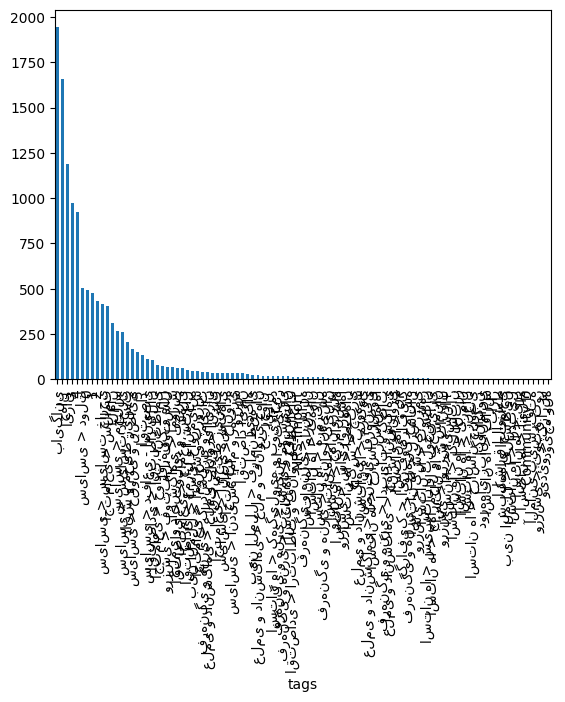

In [ ]:
 tag_frequency = data['tags'].value_counts().plot(kind='bar')

In [ ]:
tag_frequency = data['tags'].value_counts().to_dict()
tag_frequency = {key: value for key, value in tag_frequency.items() if value >= 30}
print(tag_frequency)

{'بایگانی': 1944, 'جهان': 1658, 'ایران': 1188, 3: 972, 4: 921, 'سیاسی > دولت': 506, 0: 493, 1: 478, 2: 433, 'سیاسی > سیاست خارجی': 418, 'اجتماعی > سلامت': 407, 'آلمان': 310, 'سیاسی > مجلس': 266, 'سیاسی > سیاست داخلی': 261, 'دانش و محیط زیست': 203, 'سیاسی > حقوقی و قضایی': 166, 5: 148, 'اقتصاد': 133, 'سیاسی > دفاعی - امنيتی': 110, 'اقتصادی > اقتصاد کلان': 108, 'اجتماعی > حوادث، انتظامی': 79, 'فرهنگ و هنر': 75, 'ورزشی > فوتبال، فوتسال': 68, 'علمی و دانشگاهی > آموزش': 67, 'اقتصادی > تولید و تجارت': 63, 'اجتماعی > جامعه، شهری': 61, 'اقتصادی > عمران و اشتغال': 49, 'بین الملل > آسیا،خاورمیانه': 47, 'اجتماعی > آموزش و پرورش': 46, 'فرهنگی و هنری > گردشگری و میراث': 42, 'علمی و دانشگاهی > علم و فناوری ایران': 38, 'اقتصادی > انرژی': 37, 'اجتماعی > محیط زیست': 37, 'سیاسی > انرژی هسته\u200e\u200cای': 35, 'اجتماعی > خانواده': 35, 'سیاسی > اندیشه امام و رهبری': 34, 'ورزش': 33, 'اقتصاد ایران': 32, 'دیدگاه': 31}


In [ ]:
additional_tags = {'جهان':3,'ایران':2,'سیاسی > دولت':4,'سیاسی > سیاست خارجی':4,'اجتماعی > سلامت':1,'آلمان':3,'سیاسی > مجلس':4,'سیاسی > سیاست داخلی':4,'دانش و محیط زیست':5,'سیاسی > حقوقی و قضایی':4,'اقتصاد':2,'سیاسی > دفاعی - امنيتی':4,'اقتصادی > اقتصاد کلان':1,'اجتماعی > حوادث، انتظامی':0,'فرهنگ و هنر':0,'ورزشی > فوتبال، فوتسال':5,'علمی و دانشگاهی > آموزش':5,'اقتصادی > تولید و تجارت':1,'اجتماعی > جامعه، شهری':0,'اقتصادی > عمران و اشتغال':1,'بین الملل > آسیا،خاورمیانه':3,'اجتماعی > آموزش و پرورش':0,'فرهنگی و هنری > گردشگری و میراث':5,'علمی و دانشگاهی > علم و فناوری ایران':5,'اقتصادی > انرژی':1,'اجتماعی > محیط زیست':0,'سیاسی > انرژی هسته':4,'فرهنگی و هنری > دین و اندیشه':5,'استان ها > هرمزگان':2,'استان ها > تهران':2,'استان ها > مازندران':2,'فرهنگی و هنری > رسانه':5,'اجتماعی > خانواده':5}
# other_tags = {'جهان': 3, 'ایران': 2, 'سیاسی > دولت': 4, 'سیاسی > سیاست خارجی': 4, 'اجتماعی > سلامت': 0, 'آلمان': 3, 'سیاسی > مجلس': 4, 'سیاسی > سیاست داخلی': 4, 'دانش و محیط زیست': 5, 'سیاسی > حقوقی و قضایی': 4, 'اقتصاد': 1, 'سیاسی > دفاعی - امنيتی': 4, 'اقتصادی > اقتصاد کلان': 1, 'اجتماعی > حوادث، انتظامی': 0, 'فرهنگ و هنر': 5, 'ورزشی > فوتبال، فوتسال': 5, 'علمی و دانشگاهی > آموزش': 5, 'اقتصادی > تولید و تجارت': 1, 'اجتماعی > جامعه، شهری': 0, 'اقتصادی > عمران و اشتغال': 1, 'بین الملل > آسیا،خاورمیانه': 3, 'اجتماعی > آموزش و پرورش': 0, 'فرهنگی و هنری > گردشگری و میراث': 5, 'علمی و دانشگاهی > علم و فناوری ایران': 5, 'اقتصادی > انرژی': 1, 'اجتماعی > محیط زیست': 0, 'سیاسی > انرژی هسته\u200e\u200cای': 4, 'اجتماعی > خانواده': 0, 'سیاسی > اندیشه امام و رهبری': 4, 'ورزش': 5, 'اقتصاد ایران': 1}
data['tags'] = data['tags'].replace(additional_tags)
count_tags_0 = data['tags'].value_counts()[0]
print(count_tags_0)
count_tags_1 = data['tags'].value_counts()[1]
print(count_tags_1)
count_tags_2 = data['tags'].value_counts()[2]
print(count_tags_2)
count_tags_3 = data['tags'].value_counts()[3]
print(count_tags_3)
count_tags_4 = data['tags'].value_counts()[4]
print(count_tags_4)
count_tags_5 = data['tags'].value_counts()[5]
print(count_tags_5)
counts = count_tags_5 + count_tags_4 + count_tags_3 + count_tags_2 + count_tags_1 + count_tags_0
print(counts)

791
1142
1789
2987
2648
623
9980


In [ ]:
data['tags'] = pd.to_numeric(data['tags'], errors='coerce')
data.dropna(subset=['tags'], inplace=True)
data.describe()

,tags
count,9980.000000
mean,2.744289
std,1.341687
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
data.head()

,title,description,tags
0,روایتی از تحصیل زیرسقف‌های لرزان و سرمای سوزان...,گروه استان‌ها- دانش‌آموزان مدرسه روستای کَهنان...,2.0
1,انقلابی سرشناس بحرین در گفت‌وگو با تسنیم: مردم...,گروه استان‌ها ــ انقلابی سرشناس بحرین با بیان ...,2.0
2,‌زندگی مردم در شهر قم ‌جریان دارد / پیشگیری در...,گروه استان‌ها ــ با اعلام شیوع ویروس کرونا در ...,2.0
3,واکنش &quot;پروفسور کرمی&quot; به دروغ‌پراکنی ...,یک متخصص بیوتکنولوژی پزشکی با بیان اینکه مرگ‌و...,0.0
4,مردم نگران تأمین کالاهای موردنیاز خود نباشند/ ...,رئیس اتحادیه فروشگاه‌های زنجیره‌ای با اشاره به...,1.0


In [ ]:
normalizer = hazm.Normalizer()
stemmer = hazm.Stemmer()
stopwords = hazm.stopwords_list()
def preprocess_text(text):
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[\.|\+|0-9]','',text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # text = re.sub(r"\s+", " ", text)
    text = text.strip()
    text = normalizer.normalize(text)
    words = hazm.word_tokenize(text)
    words = [word for word in words if word not in stopwords]
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)
    return text

In [ ]:
data.head()

,title,description,tags
0,روایتی از تحصیل زیرسقف‌های لرزان و سرمای سوزان...,گروه استان‌ها- دانش‌آموزان مدرسه روستای کَهنان...,2.0
1,انقلابی سرشناس بحرین در گفت‌وگو با تسنیم: مردم...,گروه استان‌ها ــ انقلابی سرشناس بحرین با بیان ...,2.0
2,‌زندگی مردم در شهر قم ‌جریان دارد / پیشگیری در...,گروه استان‌ها ــ با اعلام شیوع ویروس کرونا در ...,2.0
3,واکنش &quot;پروفسور کرمی&quot; به دروغ‌پراکنی ...,یک متخصص بیوتکنولوژی پزشکی با بیان اینکه مرگ‌و...,0.0
4,مردم نگران تأمین کالاهای موردنیاز خود نباشند/ ...,رئیس اتحادیه فروشگاه‌های زنجیره‌ای با اشاره به...,1.0


In [ ]:
data['text'] = data['title'] + ' ' + data['description']
data['text'] = data['text'].apply(preprocess_text)
data.head()

,title,description,tags,text
0,روایتی از تحصیل زیرسقف‌های لرزان و سرمای سوزان...,گروه استان‌ها- دانش‌آموزان مدرسه روستای کَهنان...,2.0,روایت تحصیل زیرسقف لرز سرما سوز دانشآموز کهنان...
1,انقلابی سرشناس بحرین در گفت‌وگو با تسنیم: مردم...,گروه استان‌ها ــ انقلابی سرشناس بحرین با بیان ...,2.0,انقلاب سرشناس بحرین گفتوگو تسن مرد منطقه پیشرف...
2,‌زندگی مردم در شهر قم ‌جریان دارد / پیشگیری در...,گروه استان‌ها ــ با اعلام شیوع ویروس کرونا در ...,2.0,زندگ مرد شهر ق پیشگیر اولو مرد قرار تصاویر گرو...
3,واکنش &quot;پروفسور کرمی&quot; به دروغ‌پراکنی ...,یک متخصص بیوتکنولوژی پزشکی با بیان اینکه مرگ‌و...,0.0,واکن quotپروفسور کرمیquot دروغپراکن رسانه quot...
4,مردم نگران تأمین کالاهای موردنیاز خود نباشند/ ...,رئیس اتحادیه فروشگاه‌های زنجیره‌ای با اشاره به...,1.0,مرد نگر تأمین کالا موردنیاز نباشند میز تولید ا...


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(data['text'], data['tags'], test_size=0.2, random_state=42)
test['text'] = test['title'] + ' ' + test['description']
test['text'] = test['text'].apply(preprocess_text)
x_test = test['text']

In [ ]:
test.tail()

,title,description,text
995,جو بایدن با بسیج وکلا برای دعوای حقوقی پس از ا...,کارزار انتخاباتی جو بایدن می‌گوید مشغول جمع‌آو...,جو بایدن بسیج وکلا دعوا حقوق انتخاب آماده_می‌ش...
996,کاهش ۹۶ درصدی مسافران بین‌المللی در صنعت هوایی...,مدیر عامل شرکت فرودگاه‌ها و ناوبری هوایی ایران...,کاه درصد مسافر بینالملل صنع هوا ایر مدیر عامل ...
997,امارات متحده عربی در سال ۲۰۱۴ فضاپیما به ماه ...,نخست وزیر و نایب رئیس امارات متحده عربی می‌گوی...,امار متحده عرب سال فضاپیما ماه می‌فرستد نخست‌و...
998,کیوان خسروی: به‌دلیل ملاحظات امنیتی علت حادثه ...,کیوان خسروی٬ سخنگوی شورای عالی امنیت ملی ایران...,کیو خسرو بهدلیل ملاحظ امنیت حادثه نطنز ز اعلا ...
999,یک گروه ناشناس مسئولیت «حمله به تاسیسات نطنز» ...,شبکه تلویزیونی بی‌بی‌سی فارسی می‌گوید که ساعات...,گروه ناشناس مسئول حمله تاسیس نطنز برعهده شبکه ...


In [ ]:
x_test.head()

0    درگیر شایع نشوید نتیجه آزما مشکوک کرونا ایلا م...
1    تخریب منازل علیآباد خرمآباد بار بار روا تصاویر...
2    اختصاص قرنطینه آیتالله شبیریزنجان صح گروه استا...
3    احتمال طغ رودخانه غرب کشور کاه شد بارش تهر ظهر...
4    تحویل طومار مرد تهر پیگرد عامل ترور شهید سلیما...
Name: text, dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y_train_oh = enc.fit_transform(y_train.values.reshape(-1,1)).toarray()
print(y_train_oh.shape)
y_val_oh = enc.transform(y_val.values.reshape(-1,1)).toarray()
print(y_val_oh.shape)

(7984, 6)
(1996, 6)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features = 200)
x_train = tfidf_vectorizer.fit_transform(x_train).toarray()
x_val = tfidf_vectorizer.transform(x_val).toarray()
x_test = tfidf_vectorizer.transform(x_test).toarray()


In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_train_oh.shape)
print(y_val_oh.shape)

(7984, 200)
(1996, 200)
(1000, 200)
(7984,)
(1996,)
(7984, 6)
(1996, 6)


In [ ]:
from xgboost import XGBClassifier
bst = XGBClassifier(objective='multi:softprob')
bst.fit(x_train, y_train)
preds = bst.predict(x_test)

In [ ]:
preds

array([2, 2, 2, 1, 3, 0, 3, 3, 4, 3, 3, 1, 2, 4, 4, 3, 4, 0, 0, 0, 2, 0,
       2, 4, 3, 4, 4, 3, 3, 1, 2, 4, 4, 2, 3, 4, 0, 4, 2, 3, 4, 0, 3, 0,
       2, 4, 3, 3, 4, 3, 3, 4, 0, 1, 0, 3, 0, 0, 3, 4, 4, 3, 0, 0, 3, 1,
       3, 3, 4, 3, 0, 3, 4, 2, 0, 4, 0, 3, 3, 1, 0, 4, 4, 1, 2, 1, 1, 3,
       1, 3, 5, 1, 4, 1, 3, 4, 1, 5, 0, 4, 4, 4, 4, 0, 3, 4, 1, 3, 4, 4,
       2, 3, 2, 0, 3, 3, 1, 1, 4, 3, 4, 4, 1, 4, 2, 3, 3, 3, 3, 4, 3, 4,
       2, 3, 2, 4, 2, 3, 1, 1, 3, 3, 5, 4, 0, 0, 1, 3, 1, 1, 1, 2, 3, 1,
       2, 2, 4, 4, 1, 3, 3, 2, 2, 1, 1, 0, 1, 4, 3, 2, 3, 2, 1, 1, 3, 1,
       3, 1, 4, 2, 3, 3, 1, 3, 4, 0, 3, 1, 4, 3, 3, 0, 1, 1, 1, 2, 2, 1,
       3, 1, 1, 4, 3, 1, 3, 0, 4, 3, 3, 1, 2, 2, 2, 4, 3, 3, 3, 4, 3, 3,
       2, 5, 2, 2, 2, 4, 2, 4, 0, 0, 0, 4, 3, 2, 3, 4, 3, 0, 2, 3, 3, 1,
       2, 4, 2, 3, 4, 3, 0, 3, 1, 0, 4, 1, 2, 1, 4, 2, 0, 0, 3, 4, 3, 1,
       3, 0, 2, 5, 1, 4, 1, 3, 0, 4, 0, 0, 3, 2, 3, 1, 2, 4, 3, 2, 3, 3,
       3, 3, 2, 5, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3,

In [ ]:
from sklearn.metrics import accuracy_score
preds = bst.predict(x_val)
accuracy = accuracy_score(y_val, preds)
print(accuracy)

0.8076152304609219


In [ ]:
from sklearn.metrics import mean_squared_error
preds = bst.predict(x_val)
mse = mean_squared_error(preds, y_val)
mse

1.1397795591182365

In [ ]:
features_tf = np.shape(tfidf_vectorizer.get_feature_names_out())[0]
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(6, activation='softmax')) 
model.compile(loss='mse', optimizer='adam',metrics=['accuracy', tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()])

In [ ]:
model.fit(x_train, y_train_oh, batch_size=20, shuffle=True, epochs=20)

Epoch 1/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0067 - accuracy: 0.9765 - precision: 0.9790 - recall: 0.9753
Epoch 2/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0064 - accuracy: 0.9778 - precision: 0.9805 - recall: 0.9771
Epoch 3/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0062 - accuracy: 0.9778 - precision: 0.9805 - recall: 0.9765
Epoch 4/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0067 - accuracy: 0.9762 - precision: 0.9785 - recall: 0.9753
Epoch 5/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0069 - accuracy: 0.9752 - precision: 0.9775 - recall: 0.9738
Epoch 6/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0063 - accuracy: 0.9775 - precision: 0.9796 - recall: 0.9765
Epoch 7/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0066 - accuracy: 0.9761 - precision: 0.9787 - recall: 0.9748
Epoch 8/20
400/400 [=====================

In [ ]:
predictions_val = model.predict(x_test)

32/32 [==============================] - 0s 1ms/step


In [ ]:
pred_test = model.predict(x_test)


32/32 [==============================] - 0s 1ms/step


In [ ]:
# model.fit(x_train, y_train_oh, batch_size=20, shuffle=True, epochs=20,validation_data=(x_val, y_val_oh))